Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [ ]:
#Created this wb to answer all questions from lab. They are all in order

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv('amz_uk_price_dataset.csv')

In [18]:
df1.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [20]:
df1.set_index('uid', inplace=True)

In [21]:
df1.isna().sum()

asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [23]:
df1.duplicated().sum()

0

In [25]:
top_category = df1['category'].value_counts().reset_index()[:5]
top_category

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


In [27]:
categories = {
    "Sports & Outdoors": "Sports",
    "Beauty": "Beauty",
    "Handmade Clothing, Shoes & Accessories": "Handmade Clothes",
    "Bath & Body": "Bath & Body",
    "Birthday Gifts": "Birthday Gifts"
}

top_category['category'] = top_category['category'].replace(categories)

In [28]:
top_category

,category,count
0,Sports,836265
1,Beauty,19312
2,Handmade Clothes,19229
3,Bath & Body,19092
4,Birthday Gifts,18978


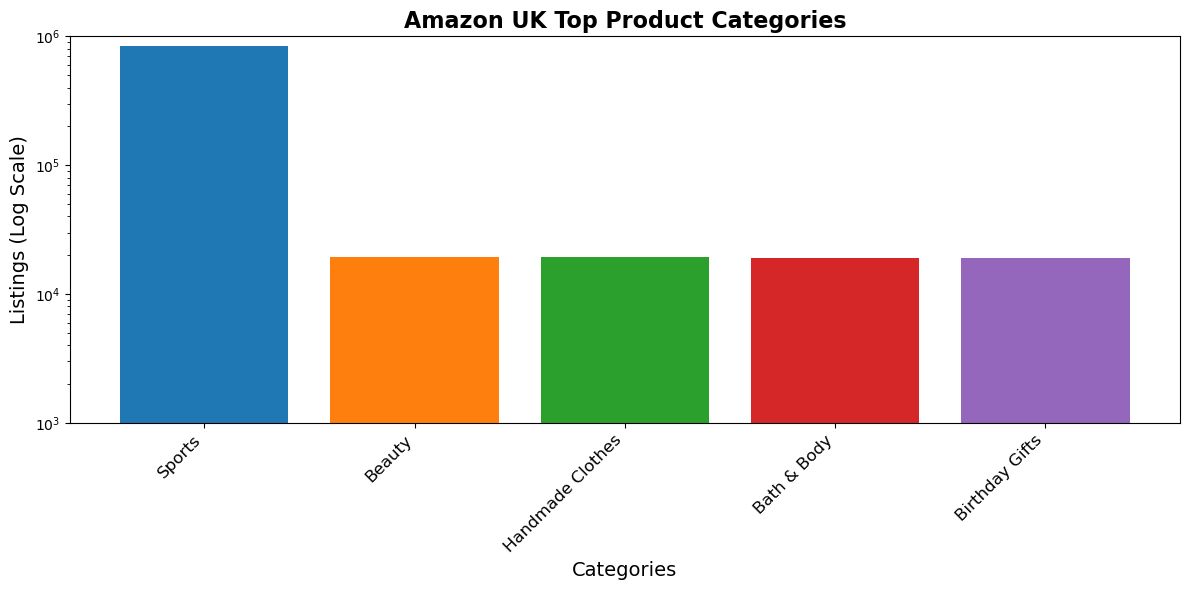

In [31]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(top_category['category'], top_category['count'], color=colors)
ax.set_yscale('log') 
ax.set_ylim(10**3, 10**6) 
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Listings (Log Scale)', fontsize=14)
ax.set_title('Amazon UK Top Product Categories', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

Text(0, 0.5, '')

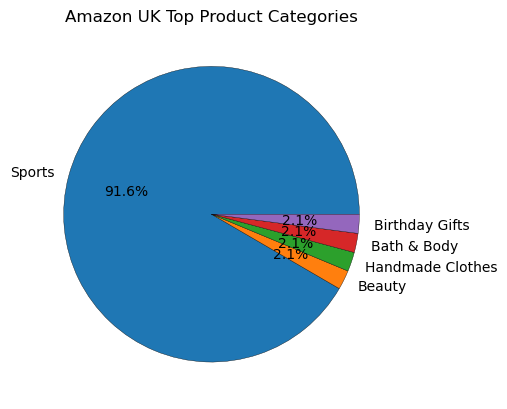

In [32]:
top_category.set_index('category')['count'].plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    colors = colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.25}
)
plt.title('Amazon UK Top Product Categories')
plt.ylabel('')

In [34]:
p_mean = df1['price'].mean().round(2)
print(f'The average price is {p_mean}')

The average price is 89.24


In [36]:
p_median = df1['price'].median()
print(f'The price median is {p_median}')

The price median is 19.09


In [39]:
p_mode = df1['price'].mode()[0]
print(f'The price mode is {p_mode}')

The price mode is 9.99


In [43]:
p_variance = df1['price'].apply(lambda x: (x - p_mean) ** 2).mean().round(2)
print(f'Variance is {p_variance}')

Variance is 119445.44


In [44]:
p_stdeviation = np.sqrt(p_variance).round(2)
print(f'Standard Deviation is {p_stdeviation}')

Standard Deviation is 345.61


In [45]:
p_range = (df1['price'].max() - df1['price'].min())
print(f'Prices range from {df1['price'].min()} to {df1['price'].max()}')

Prices range from 0.0 to 100000.0


In [47]:
Q1 = df1['price'].quantile(0.25).round(2)
Q3 = df1['price'].quantile(0.75).round(2)
print(f'First Quartile: {Q1}\nThird Quartile: {Q3}')

First Quartile: 9.99
Third Quartile: 45.99


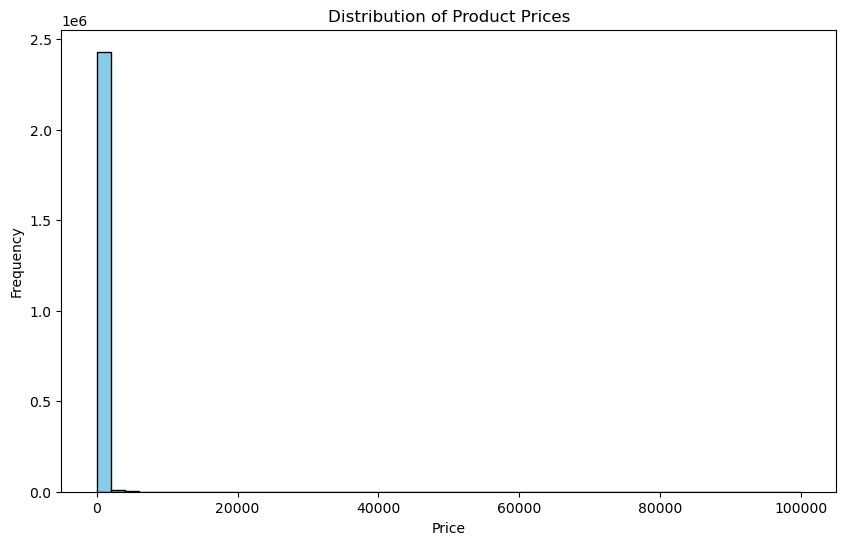

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df1['price'], bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')

plt.show()

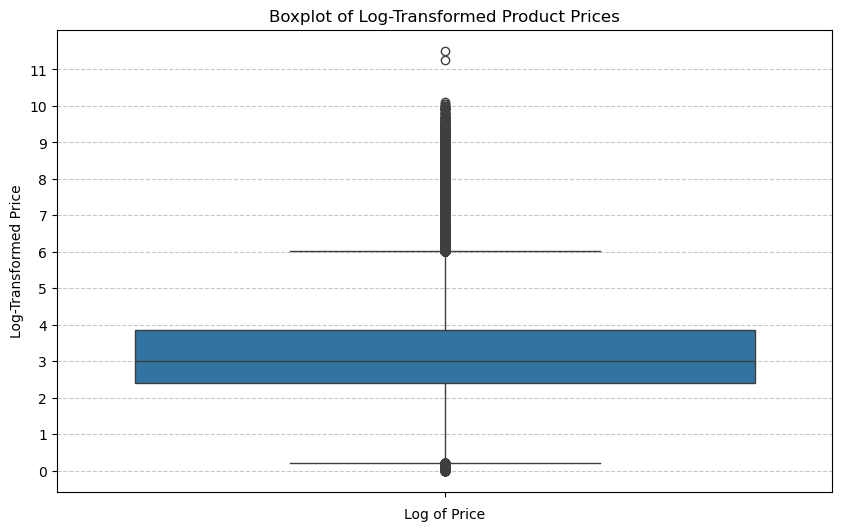

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = np.log1p(df1['price']))

plt.xlabel('Log of Price')
plt.ylabel('Log-Transformed Price')
plt.title('Boxplot of Log-Transformed Product Prices')

plt.grid(axis='y', linestyle='--', alpha=0.7)
max_log_price = int(np.log1p(df1['price']).max())
plt.yticks(ticks=np.arange(0, max_log_price + 1, 1))  

plt.show()

In [54]:
df2 = df1[df1['reviews'] > 1]
print(f'Total products with review {len(df2)}')

Total products with review 1127977


In [56]:
s_mean = df2['stars'].mean().round(1)
print(f'The average product rate is {s_mean} stars')

The average product rate is 4.3 stars


In [57]:
s_median = df2['stars'].median()
print(f'Half the ratings fall within {s_median} stars')

Half the ratings fall within 4.4 stars


In [59]:
s_mode = df2['stars'].mode()[0]
print(f'The most popular rating is {s_mode} stars')

The most popular rating is 4.5 stars


In [61]:
print(f'Variance: {round(df2['stars'].var(), 1)} stars')

Variance: 0.2 stars


In [62]:
print(f'1Q {round(df2['stars'].quantile(0.25), 1)} stars')
print(f'3Q {round(df2['stars'].quantile(0.75), 1)} stars')

1Q 4.1 stars
3Q 4.6 stars


In [63]:
print(f'Skewness for ratings is {df2['stars'].skew().round(2)}.')

Skewness for ratings is -1.77.


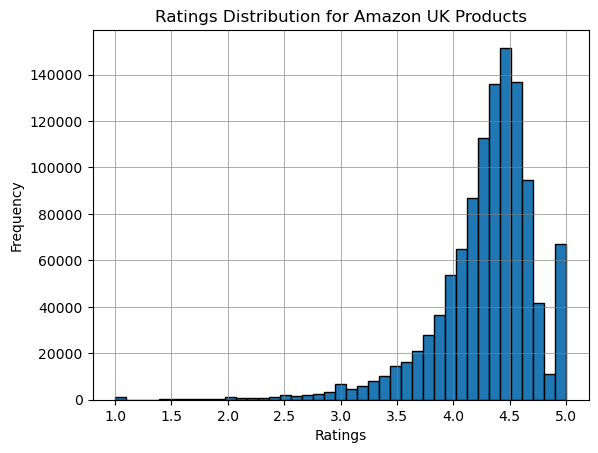

In [65]:
plt.hist(df2['stars'], bins=df2['stars'].nunique(), edgecolor='black')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Ratings Distribution for Amazon UK Products')

plt.grid(visible=True, which='both', color='gray', linewidth=0.5, alpha=0.9)